In [17]:
import numpy as np

import pickle
import pandas as pd

from imutils import paths
import argparse
import cv2

from matplotlib import pyplot as plt

from collections import Counter

import sys

from scipy.misc import imread
from scipy.linalg import norm
from scipy import sum, average

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [3]:
with open('/Users/donalddressen/Desktop/auction_data/ids_urls.pkl', 'rb') as f:
    ids_urls = pickle.load(f)

In [4]:
# img = cv2.imread('/Users/donalddressen/Desktop/auction_data/photos/273032516199.jpg')

In [5]:
def LaplacianVariance(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()
# compute the Laplacian of the image and then return the focus measure, which is simply the variance of the Laplacian method

In [6]:
fms = []
blurs = []

# loop over the input images
for item in ids_urls:
    
    try:
        # load the image, convert it to grayscale, and compute the
        # focus measure of the image using the Variance of Laplacian
        # method
        image_path = '/Users/donalddressen/Desktop/auction_data/photos/'+ item[0] +'.jpg'
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        fm = LaplacianVariance(gray)
        fms.append(fm)
 
        # if the focus measure is less than the supplied threshold,
        # then the image should be considered "blurry"
        threshold = 500
        if fm < threshold:
            blurs.append(1)
        else:
            blurs.append(0)
            
    except:
        fms.append(float(500))
        blurs.append(0)

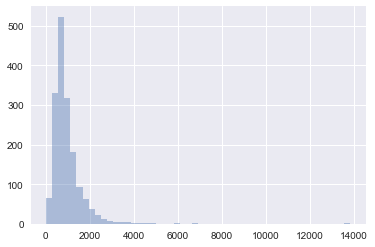

In [7]:
sns.distplot(fms, kde=False)

In [8]:
Counter(blurs)

Counter({0: 1387, 1: 294})

In [9]:
# def main():
#     file1, file2 = sys.argv[1:1+2]
#     # read images as 2D arrays (convert to grayscale for simplicity)
#     img1 = to_grayscale(imread(file1).astype(float))
#     img2 = to_grayscale(imread(file2).astype(float))
#     # compare
#     n_m, n_0 = compare_images(img1, img2)
#     print "Manhattan norm:", n_m, "/ per pixel:", n_m/img1.size
#     print "Zero norm:", n_0, "/ per pixel:", n_0*1.0/img1.size

# def compare_images(img1, img2):
#     # normalize to compensate for exposure difference
#     img1 = normalize(img1)
#     img2 = normalize(img2)
#     # calculate the difference and its norms
#     diff = img1 - img2  # elementwise for scipy arrays
#     m_norm = sum(abs(diff))  # Manhattan norm
#     z_norm = norm(diff.ravel(), 0)  # Zero norm
#     return (m_norm, z_norm)

# def to_grayscale(arr):
#     "If arr is a color image (3D array), convert it to grayscale (2D array)."
#     if len(arr.shape) == 3:
#         return average(arr, -1)  # average over the last axis (color channels)
#     else:
#         return arr

# def normalize(arr):
#     rng = arr.max()-arr.min()
#     amin = arr.min()
#     return (arr-amin)*255/rng

In [10]:
def normalize(arr):
    rng = arr.max()-arr.min()
    amin = arr.min()
    return (arr-amin)*255/rng

In [11]:
m_norm_hs = []
z_norm_hs = []
m_norm_vs = []
z_norm_vs = []

for item in ids_urls:
    
    try:
        image_path = '/Users/donalddressen/Desktop/auction_data/photos/'+ item[0] +'.jpg'
        gray = cv2.imread(image_path, 0)
        horizontal_gray = gray.copy()
        vertical_gray = gray.copy()
        
        gray = normalize(gray)
        horizontal_gray = normalize(horizontal_gray)
        vertical_gray = normalize(vertical_gray)
        
        horizontal_gray = cv2.flip(horizontal_gray, 0)
        vertical_gray = cv2.flip(vertical_gray, 1)
        
        diff_h = gray - horizontal_gray
        diff_v = gray - vertical_gray
        
        m_norm_hs.append(sum(abs(diff_h)))
        z_norm_hs.append(norm(diff_h.ravel(), 0))
        
        m_norm_vs.append(sum(abs(diff_v)))
        z_norm_vs.append(norm(diff_v.ravel(), 0))
        
    except:
        m_norm_hs.append(float(0))
        z_norm_hs.append(float(0))
        m_norm_vs.append(float(0))
        z_norm_vs.append(float(0))

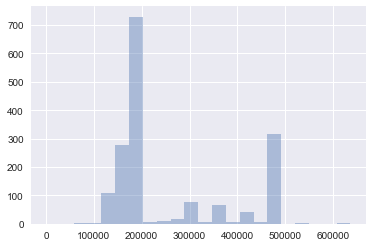

In [12]:
sns.distplot(z_norm_hs, kde=False)

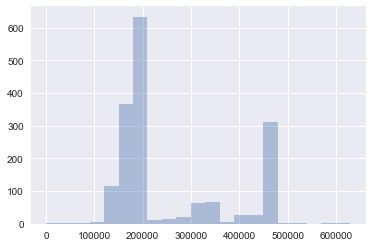

In [13]:
sns.distplot(z_norm_vs, kde=False)

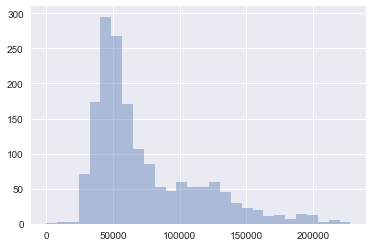

In [14]:
sns.distplot(m_norm_hs, kde=False)

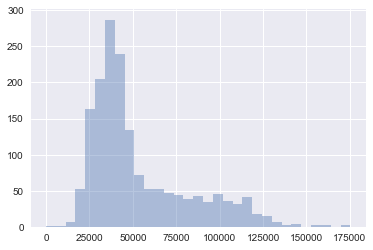

In [15]:
sns.distplot(m_norm_vs, kde=False)

In [18]:
image_df = pd.DataFrame(
    {'fm': fms,
     'blur': blurs,
     'z norm horiz': z_norm_hs,
     'z norm vert': z_norm_vs,
     'm norm horiz': m_norm_hs,
     'm norm vert': m_norm_vs
    })

In [19]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 6 columns):
blur            1681 non-null int64
fm              1681 non-null float64
m norm horiz    1681 non-null float64
m norm vert     1681 non-null float64
z norm horiz    1681 non-null float64
z norm vert     1681 non-null float64
dtypes: float64(5), int64(1)
memory usage: 78.9 KB


In [21]:
filename = '/Users/donalddressen/Desktop/auction_data/image_df.pkl'
pickle.dump(image_df, open(filename, 'wb'))